In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv("./data/cleaned_weather.csv")
print("Data shape:", data.shape)
data.head()


Data shape: (71978, 15)


,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,2017-03-12,71.06,87.08,80.06,4.473880,360.0,21.027236,0.00000,0.000000,0.000000
1,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2017-02-07,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.11811,22.047256,0.000000
2,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2017-03-30,37.04,53.96,44.24,4.026492,360.0,19.908766,0.00000,0.000000,0.070866
3,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2017-06-22,35.96,73.04,59.72,3.579104,360.0,19.013990,0.00000,0.000000,0.000000
4,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,2017-07-25,53.06,87.08,71.60,6.039738,360.0,21.922012,0.00000,0.000000,0.000000


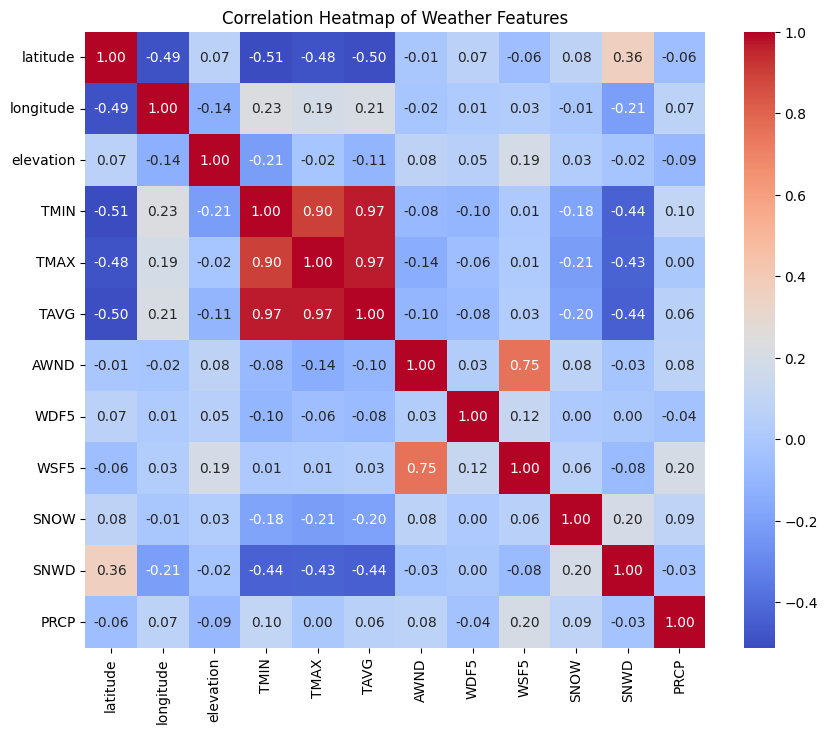

In [3]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Weather Features")
plt.show()

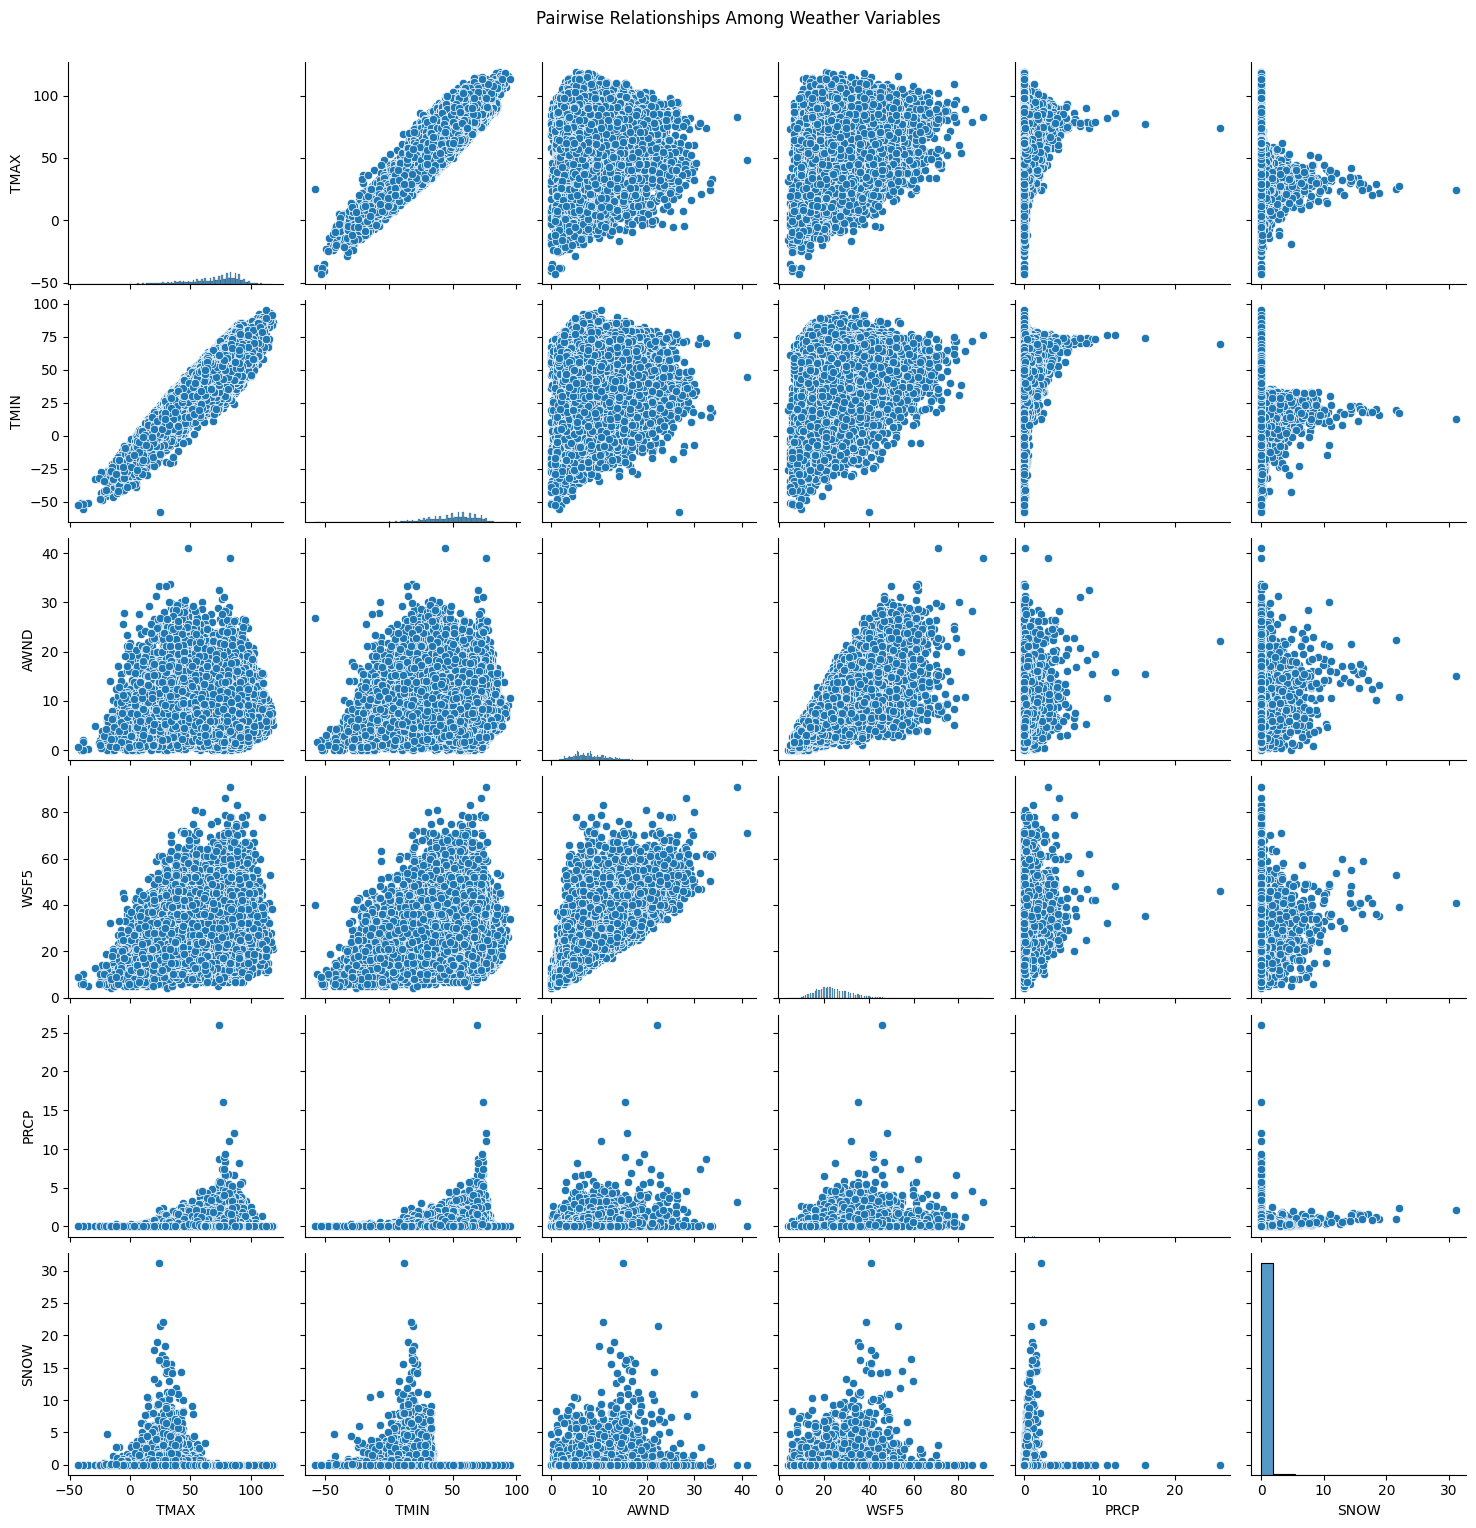

In [4]:
# Pairplot for Weather Variables
sns.pairplot(data[['TMAX', 'TMIN', 'AWND', 'WSF5', 'PRCP', 'SNOW']].dropna())
plt.suptitle("Pairwise Relationships Among Weather Variables", y=1.02)
plt.show()

In [5]:
features = ['latitude', 'longitude', 'elevation', 'TMIN', 'AWND', 'WSF5']
target = 'TMAX'

X = data[features]
y = data[target]

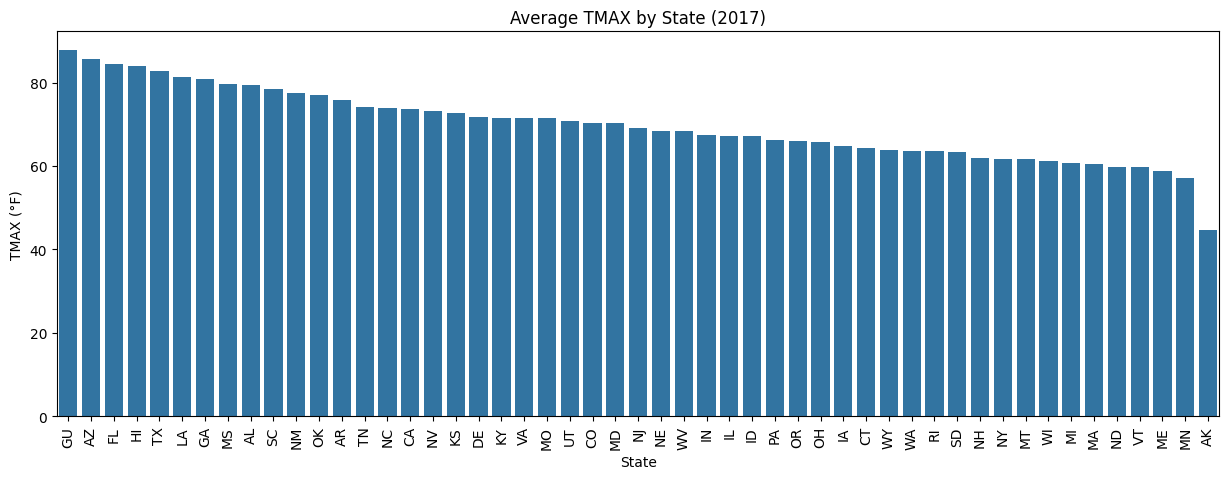

In [6]:
# Geospatial Map - Average TMAX by State
state_avg = data.groupby('state')['TMAX'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=state_avg.sort_values('TMAX', ascending=False), x='state', y='TMAX')
plt.xticks(rotation=90)
plt.title("Average TMAX by State (2017)")
plt.xlabel("State")
plt.ylabel("TMAX (°F)")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (57582, 6)
Test set: (14396, 6)


In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Results")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.4f}")


Random Forest Results
Mean Squared Error: 48.54
R² Score: 0.8844


In [9]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost Results")
print(f"Mean Squared Error: {xgb_mse:.2f}")
print(f"R² Score: {xgb_r2:.4f}")


XGBoost Results
Mean Squared Error: 45.08
R² Score: 0.8927


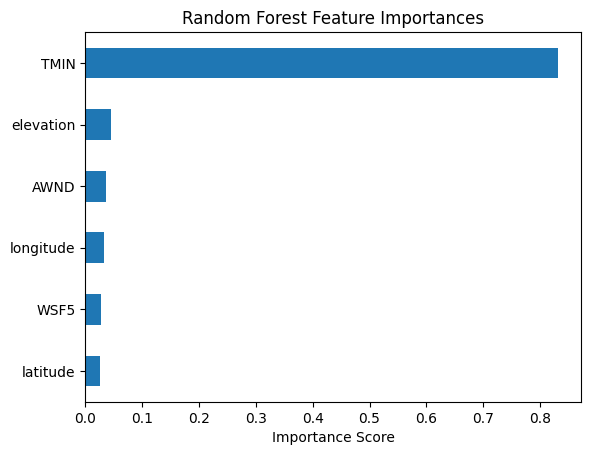

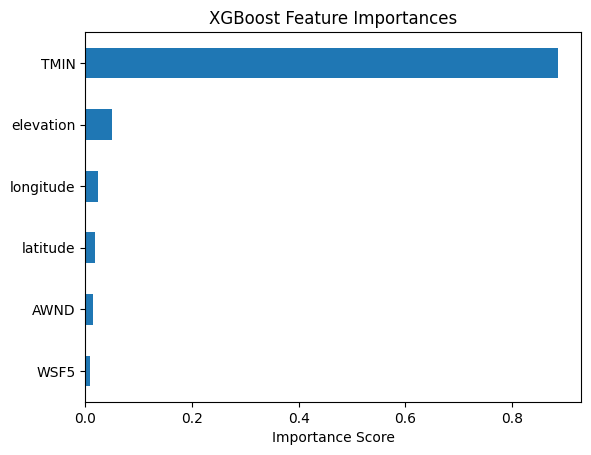

In [10]:
rf_importances = pd.Series(rf_model.feature_importances_, index=features)
rf_importances.sort_values().plot(kind='barh', title="Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.show()

# XGBoost
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features)
xgb_importances.sort_values().plot(kind='barh', title="XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.show()

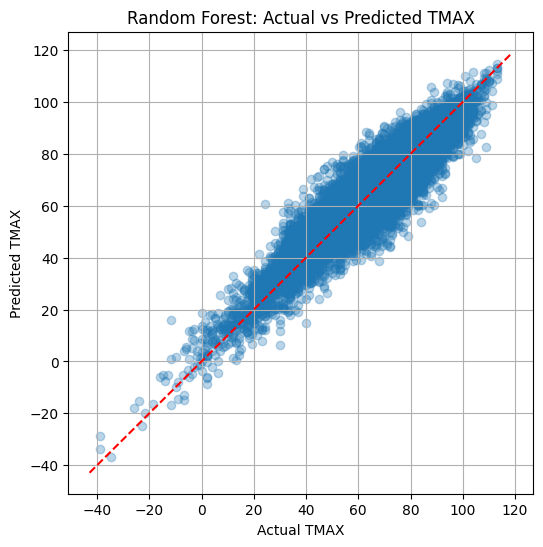

In [11]:
# Random Forest: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual TMAX")
plt.ylabel("Predicted TMAX")
plt.title("Random Forest: Actual vs Predicted TMAX")
plt.grid(True)
plt.show()


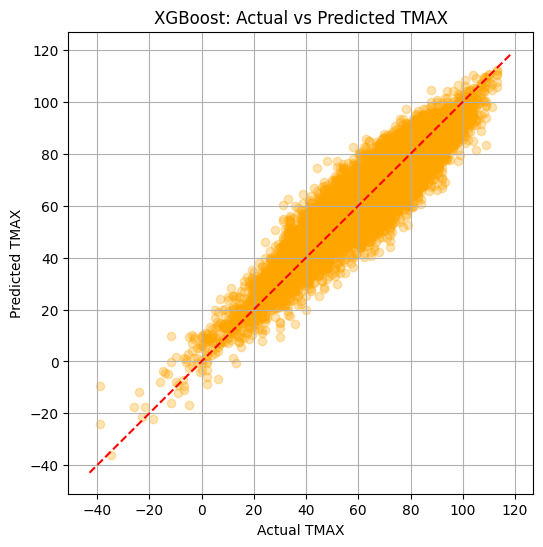

In [12]:
# XGBoost: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_preds, alpha=0.3, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual TMAX")
plt.ylabel("Predicted TMAX")
plt.title("XGBoost: Actual vs Predicted TMAX")
plt.grid(True)
plt.show()


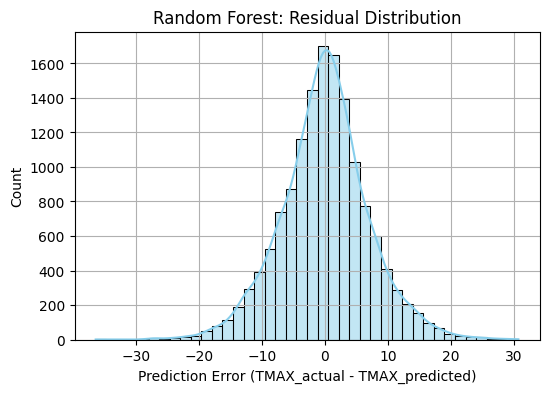

In [13]:
# Random Forest: Residual Plot
rf_residuals = y_test - rf_preds

plt.figure(figsize=(6, 4))
sns.histplot(rf_residuals, kde=True, bins=40, color='skyblue')
plt.title("Random Forest: Residual Distribution")
plt.xlabel("Prediction Error (TMAX_actual - TMAX_predicted)")
plt.grid(True)
plt.show()


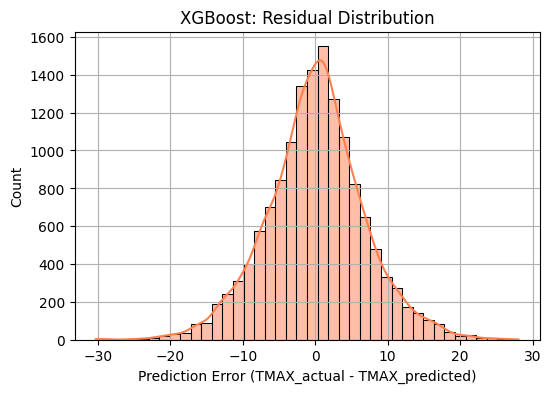

In [14]:
# XGBoost: Residual Plot
xgb_residuals = y_test - xgb_preds

plt.figure(figsize=(6, 4))
sns.histplot(xgb_residuals, kde=True, bins=40, color='coral')
plt.title("XGBoost: Residual Distribution")
plt.xlabel("Prediction Error (TMAX_actual - TMAX_predicted)")
plt.grid(True)
plt.show()
